In [1]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib as plt

In [2]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers, models

In [ ]:
data = pd.read_csv("../data/synthetic_slip_dataset.csv")
print(data.head)

<bound method NDFrame.head of       vehicle_speed  wheel_angular_velocity  wheel_torque  normal_force  \
0          1.200622               53.549475    375.194305   2207.166450   
1          1.916561              145.540812    180.181876   2736.170225   
2         29.279182              139.445448     21.433533   2939.446432   
3         29.081759              104.401250    297.362223   3401.003584   
4         22.279528               69.233288    291.330147   2440.730888   
...             ...                     ...           ...           ...   
4995      35.345397              128.594570    105.119779   2854.700459   
4996      26.903250                3.997080     54.371727   3478.167436   
4997      31.024466              146.813280    209.472277   2165.456825   
4998      37.458252               41.292579    404.043920   3089.698965   
4999      35.306713               56.218278    358.039996   3980.939059   

      tire_temp  steering_angle  slip_ratio  
0     20.217673        

In [4]:
from sklearn.model_selection import train_test_split

In [6]:
data['slip_ratio_norm'] = (data['slip_ratio'] + 1) / 2

In [8]:
x = data[["vehicle_speed", "wheel_angular_velocity", "wheel_torque", "normal_force", "tire_temp", "steering_angle"]]
y = data[["slip_ratio_norm"]]

In [10]:
print(y)

      slip_ratio_norm
0            1.000000
1            1.000000
2            0.717117
3            0.545013
4            0.490845
...               ...
4995         0.543665
4996         0.017180
4997         0.713283
4998         0.179025
4999         0.262839

[5000 rows x 1 columns]


In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=1)

In [12]:
train_data = x_train.join(y_train)
train_data.head()

,vehicle_speed,wheel_angular_velocity,wheel_torque,normal_force,tire_temp,steering_angle,slip_ratio_norm
4740,27.603564,66.582176,411.878502,2449.141187,58.187799,-0.181352,0.357077
1452,9.017430,58.685724,477.462193,2478.606087,58.860708,0.274077,0.992056
2846,33.320728,96.003210,105.311613,3425.906998,28.249619,0.094516,0.428518
4670,1.527667,155.519387,307.162691,3562.083562,49.407269,-0.396842,1.000000
168,33.059168,75.377578,321.612007,3016.601693,55.443707,-0.098584,0.346595


In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

In [15]:
import tensorflow as tf
import numpy as np

model = models.Sequential([
    layers.Dense(24, input_shape=(6,)),
    layers.BatchNormalization(),
    layers.Activation('sigmoid'),
    layers.Dense(12),
    layers.BatchNormalization(),
    layers.Activation('sigmoid'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='mae',
    metrics=['mae']
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
history = model.fit(x_train_scaled, y_train, validation_data = (x_val_scaled, y_val), epochs=100, batch_size=32)

Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0470 - mae: 0.0470 - val_loss: 0.0306 - val_mae: 0.0306
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0503 - mae: 0.0503 - val_loss: 0.0234 - val_mae: 0.0234
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0547 - mae: 0.0547 - val_loss: 0.0259 - val_mae: 0.0259
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0436 - mae: 0.0436 - val_loss: 0.0398 - val_mae: 0.0398
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0502 - mae: 0.0502 - val_loss: 0.0219 - val_mae: 0.0219
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0455 - mae: 0.0455 - val_loss: 0.0226 - val_mae: 0.0226
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0495 - mae: 0.0495 - val_loss: 0.0211 - val_mae: 0.0211
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0520 - mae: 0.0520 - val_loss: 0.0256 - val_mae: 0.0256
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.04

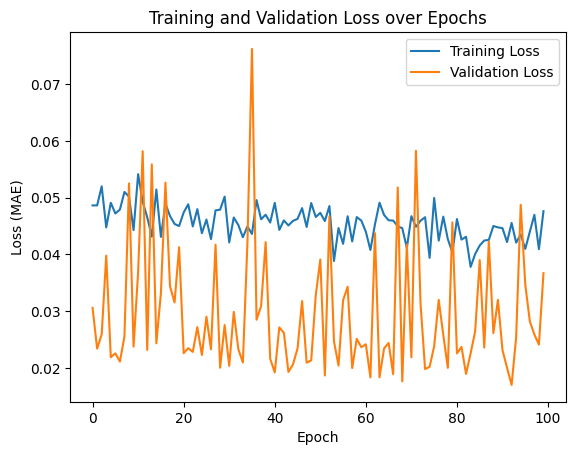

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (MAE)')
plt.legend()
plt.show()

In [26]:
preds = (model.predict(x_test_scaled) * 2) - 1

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [34]:
results_df = pd.DataFrame({'Actual Slip Ratio': (y_test['slip_ratio_norm'] * 2 ) - 1, 'Predicted Slip Ratio': preds.flatten()})
display(results_df)

,Actual Slip Ratio,Predicted Slip Ratio
2764,-0.766002,-0.783470
4767,1.000000,0.835776
3814,0.228655,0.148920
3499,0.261176,0.185921
2735,0.701891,0.720904
...,...,...
448,1.000000,0.684930
921,1.000000,0.987824
4087,0.757408,0.676314
1242,-0.802684,-0.840465


In [20]:
  model.save('slip_ratio_toy_model.h5')
print("Model saved to slip_ratio_toy_model.h5")

Model saved to slip_ratio_toy_model.h5


In [21]:
model.save('slip_ratio_toy_model.keras')
print("Model saved to slip_ratio_toy_model.keras")

Model saved to slip_ratio_toy_model.keras


In [25]:
import numpy as np
np.savez("scaler_values.npz", mean=scaler.mean_, scale=scaler.scale_)